In [1]:
!pip install xgboost

In [2]:
##Traer librerias
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
##Leer datos
df = pd.read_csv("/content/housing.csv", sep=",")
columns = df.columns
print(df)

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0    0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
1    0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
2    0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3    0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4    0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222     18.7   
..       ...  ...    ...   ...    ...    ...   ...     ...  ...  ...      ...   
500  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
501  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
502  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
503  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
504  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          B  LSTAT  MEDV  


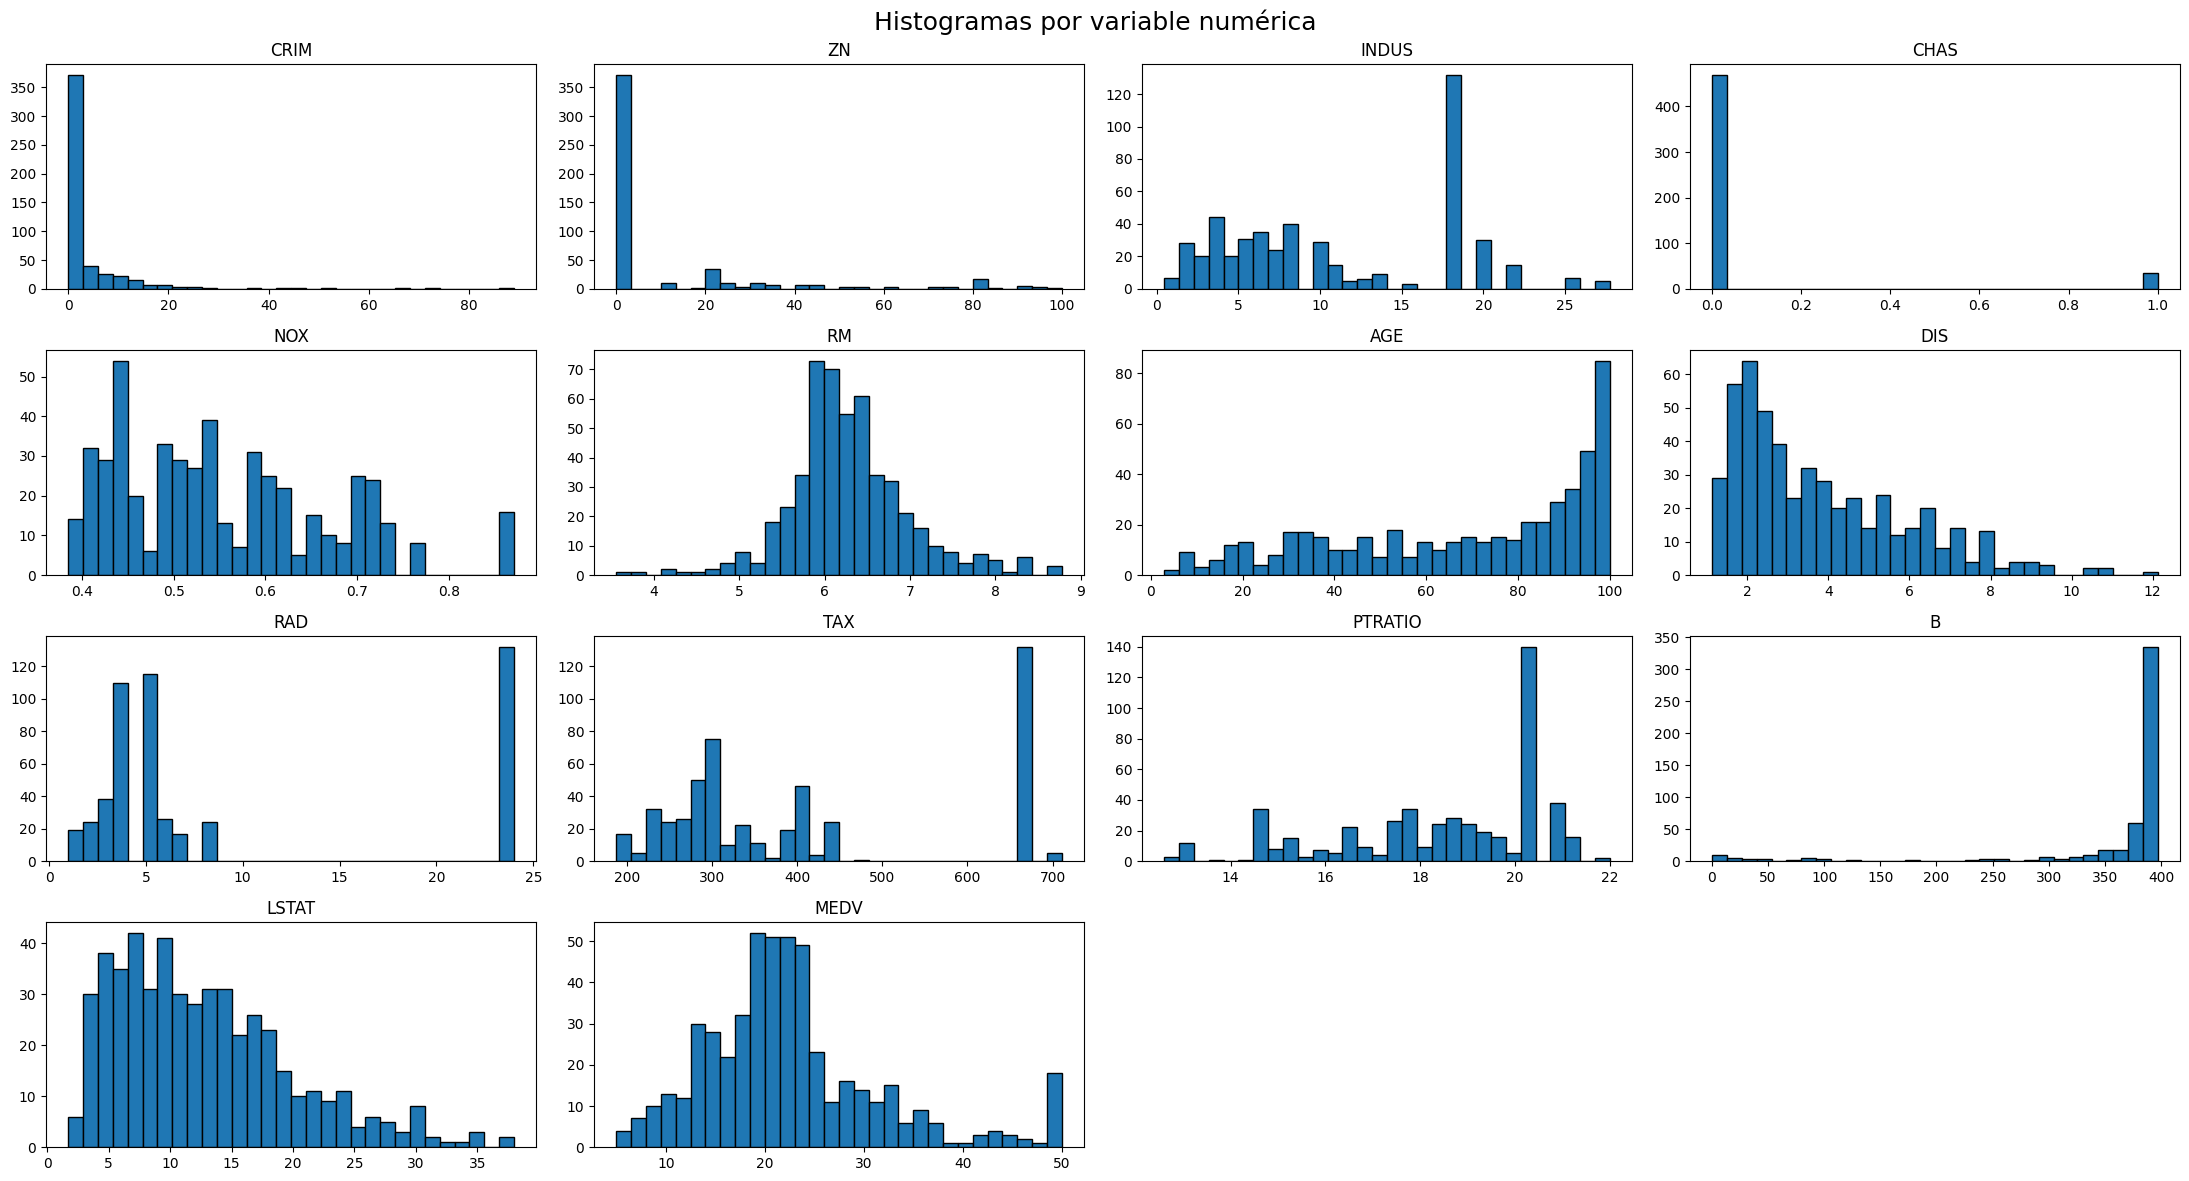

In [5]:
df.select_dtypes(include="number").hist(
    figsize=(22, 12), bins=30, grid=False, edgecolor='black'
)
plt.suptitle("Histogramas por variable numérica", fontsize=18)
plt.tight_layout()
plt.show()

In [6]:
##Separar los datos de entrenamiento y prueba
X= df.drop("MEDV", axis=1)#todas las variables predictoras a excepción de MEDV
y= df["MEDV"] # Variable objetivo - valor de las viviendas.

##ojo importante: seguir la secuencia
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [7]:
##Crear modelo y entrenar
modelo=XGBRegressor(max_depth=2, objective="reg:squarederror", random_state=1)
modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

<function matplotlib.pyplot.show(close=None, block=None)>

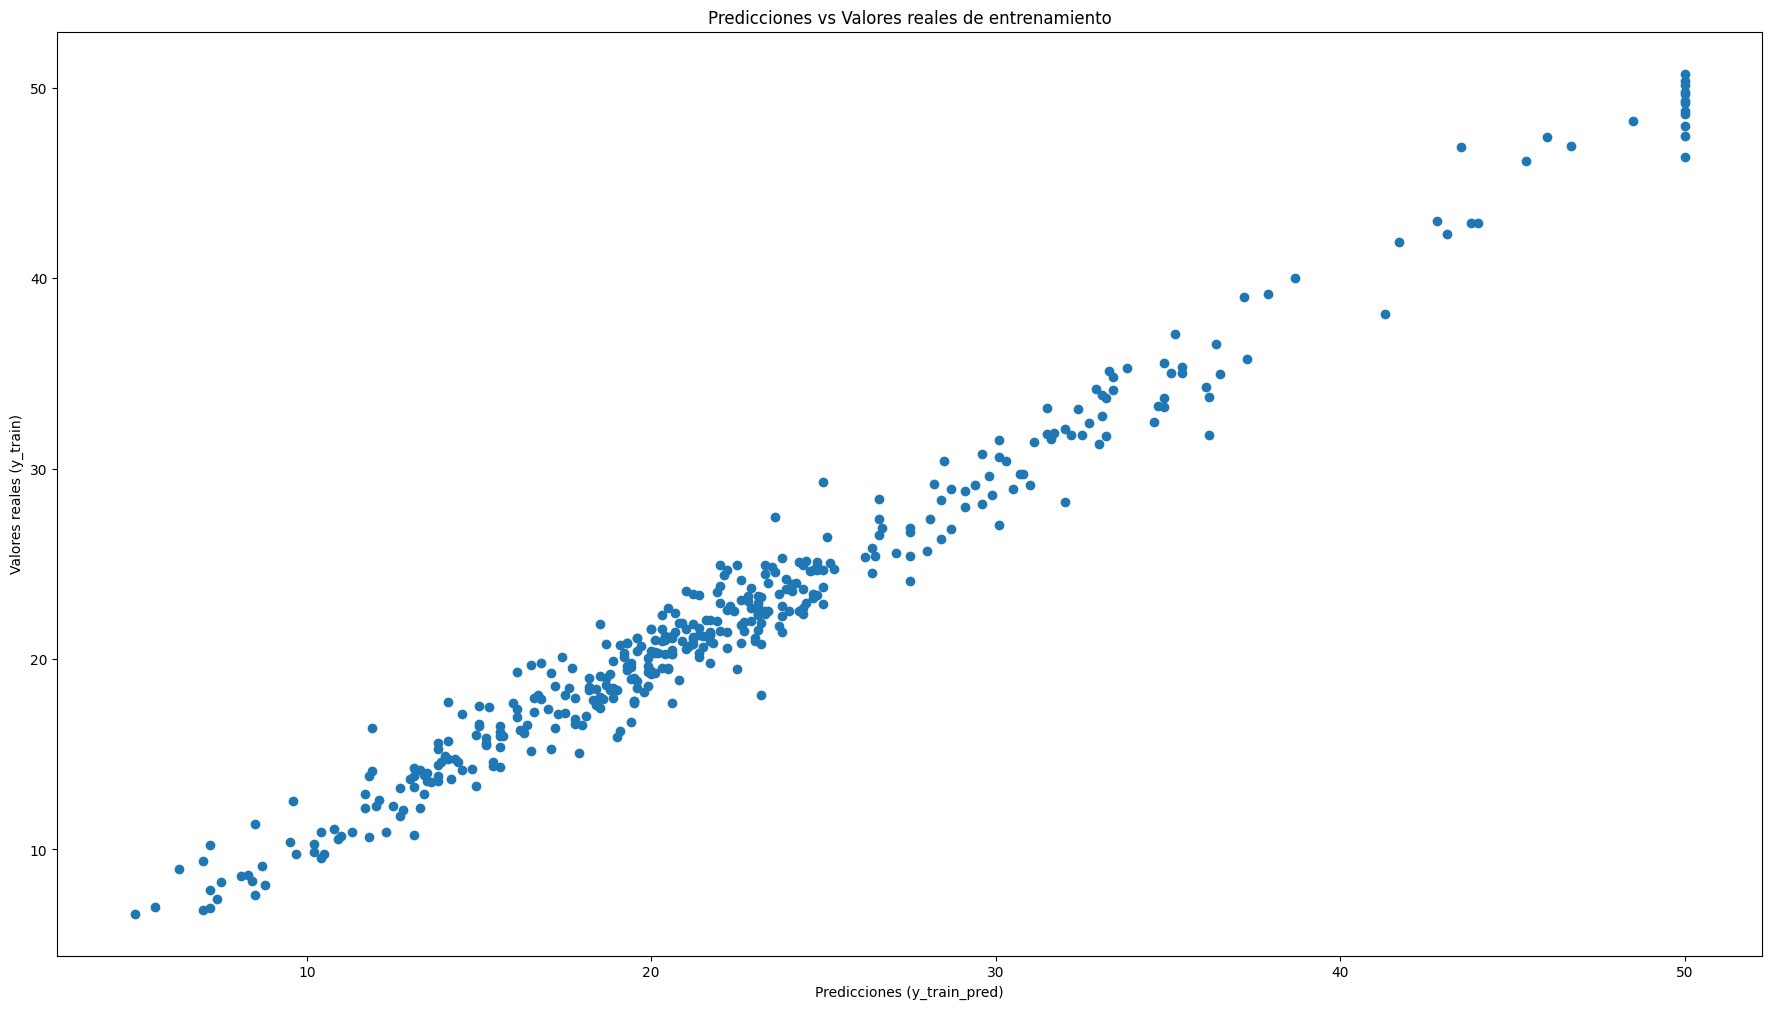

In [8]:
## Predecir valores de entrenamiento y prueba
y_train_pred= modelo.predict(X_train)
plt.figure(figsize=(22, 12))
plt.scatter(y_train, y_train_pred)
plt.ylabel("Valores reales (y_train)")
plt.xlabel("Predicciones (y_train_pred)")
plt.title("Predicciones vs Valores reales de entrenamiento")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

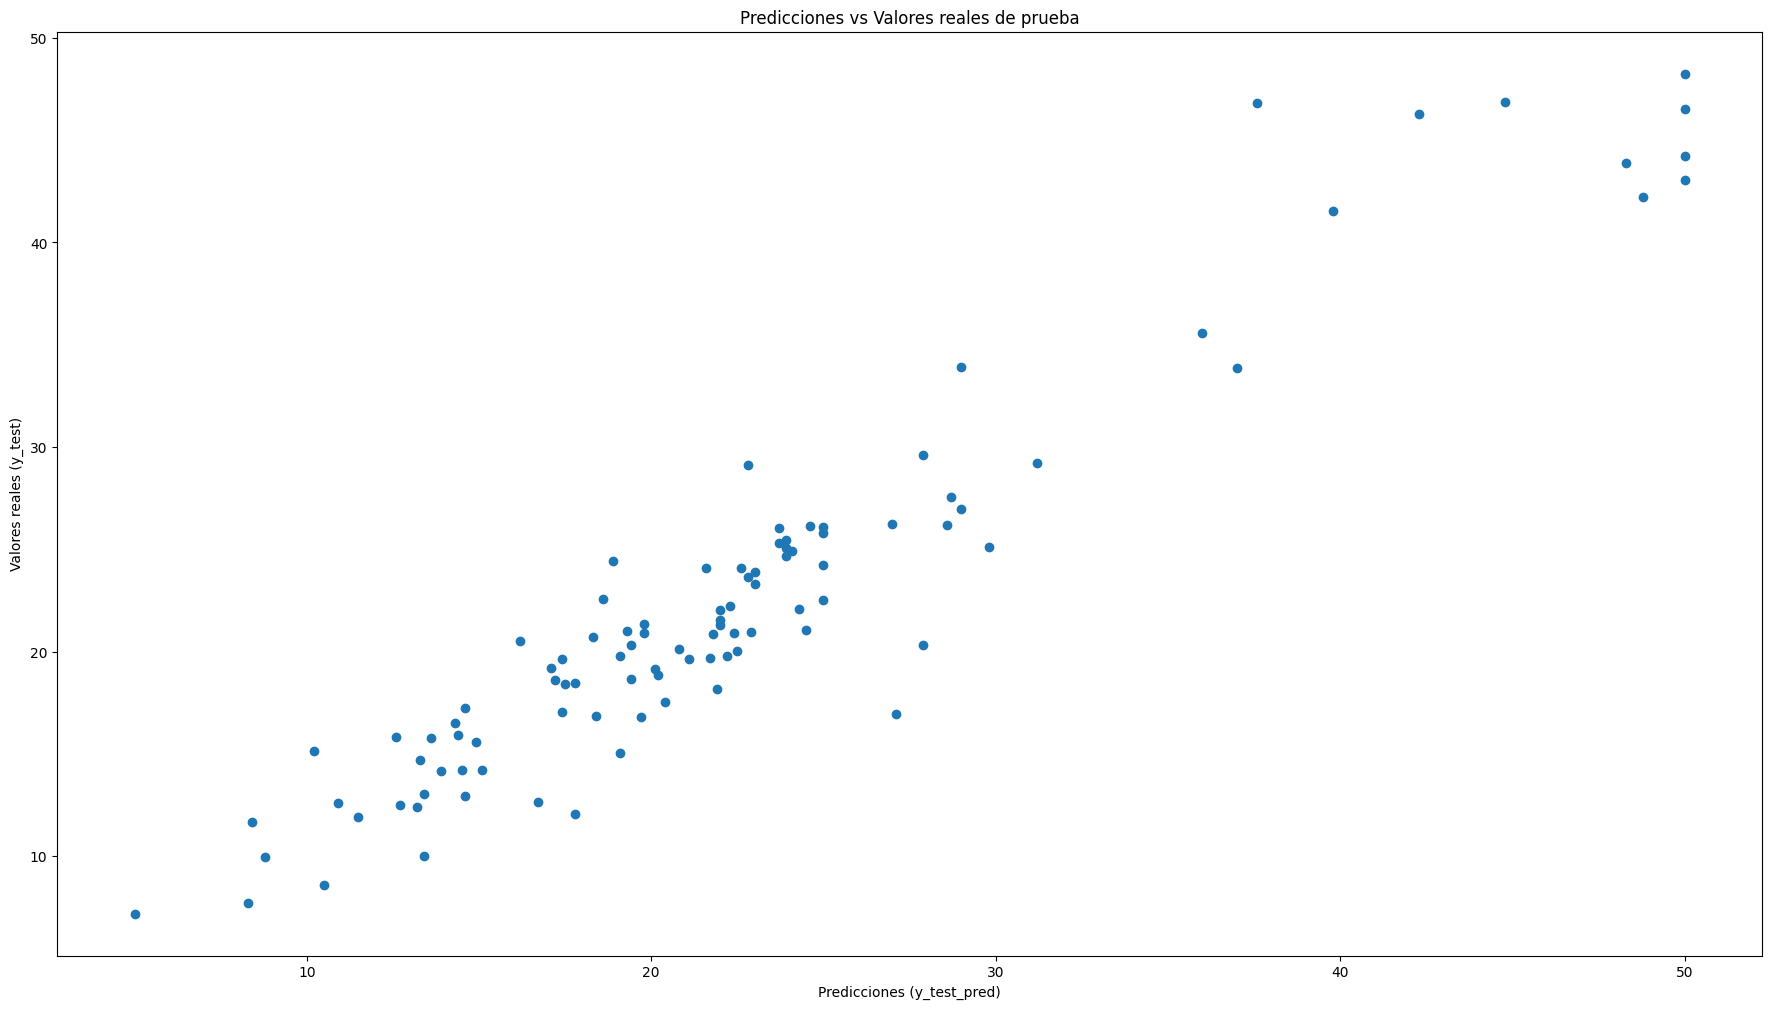

In [9]:
## Predecir valores de entrenamiento y prueba
y_test_pred= modelo.predict(X_test)
plt.figure(figsize=(22, 12))
plt.scatter(y_test, y_test_pred)
plt.ylabel("Valores reales (y_test)")
plt.xlabel("Predicciones (y_test_pred)")
plt.title("Predicciones vs Valores reales de prueba")
plt.show

In [10]:
## Calcular y mostrar el eeror cuadratico medio (MSE) en el conjunto de entrenamiento
mse_entrenamiento = mean_squared_error(y_true=y_train,y_pred= y_train_pred)
print(f"error cuadratico medio (MSE) en conjunto de entrenamiento", mse_entrenamiento)

error cuadratico medio (MSE) en conjunto de entrenamiento 1.9481244758804168


In [11]:
## Calcular y mostrar el eeror cuadratico medio (MSE) en el conjunto de prueba
mse_prueba = mean_squared_error(y_true=y_test, y_pred= y_test_pred)
print(f"error cuadratico medio (MSE) en conjunto de prueba", mse_prueba)

error cuadratico medio (MSE) en conjunto de prueba 9.020936232432547
